**Assignment 11:** Load and Preprocess CIFAR-10 with Augmentation.

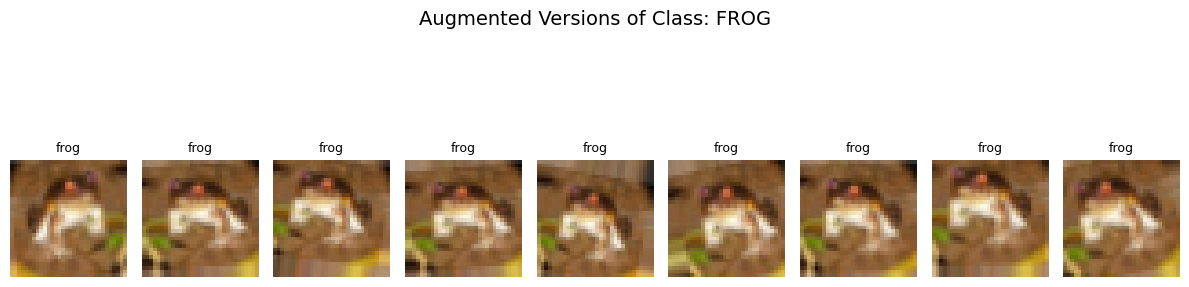

In [5]:
# Assignment 11 (Updated): Show Augmented CIFAR-10 Images with Class Labels

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Step 1: Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# CIFAR-10 class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Step 2: Create Data Augmentation Generator
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1
)
datagen.fit(x_train)

# Step 3: Pick a sample image and label
sample_index = 0
sample_image = np.expand_dims(x_train[sample_index], axis=0)
repeated_images = np.repeat(sample_image, repeats=9, axis=0)
label_index = np.argmax(y_train[sample_index])
label_text = class_names[label_index]

# Step 4: Generate 9 augmented versions
augmented_images = datagen.flow(repeated_images, batch_size=9, shuffle=False)
augmented_batch = next(augmented_images)

# Step 5: Display augmented images with class label
plt.figure(figsize=(12, 4))
for i in range(9):
    plt.subplot(1, 9, i + 1)
    plt.imshow(augmented_batch[i])
    plt.title(label_text, fontsize=9)
    plt.axis('off')
plt.suptitle(f'Augmented Versions of Class: {label_text.upper()}', fontsize=14)
plt.tight_layout()
plt.show()
